In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [2]:
car= pd.read_csv('C:\\Users\\arti\\Desktop\\dataset\\car.csv',names=['buying','maint','doors','persons','lug_boot','safety','class'])

In [3]:
car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
car.shape

(1728, 7)

# preprocessing

In [5]:
car.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 47.3+ KB


In [7]:
car['buying'].value_counts()

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64

In [8]:
car['maint'].value_counts()

vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64

In [9]:
car['doors'].value_counts()

2        432
3        432
4        432
5more    432
Name: doors, dtype: int64

In [10]:
car['persons'].value_counts()

2       576
4       576
more    576
Name: persons, dtype: int64

In [11]:
car['lug_boot'].value_counts()

small    576
med      576
big      576
Name: lug_boot, dtype: int64

In [12]:
car['safety'].value_counts()

low     576
med     576
high    576
Name: safety, dtype: int64

# EDA

C:\Users\arti\anaconda3\anaconda.3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='maint', ylabel='count'>

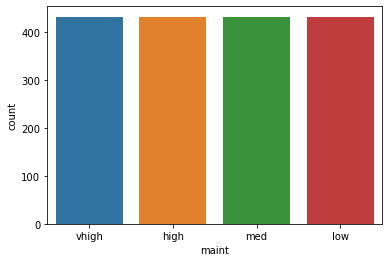

In [13]:
sns.countplot(car['maint'])

C:\Users\arti\anaconda3\anaconda.3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

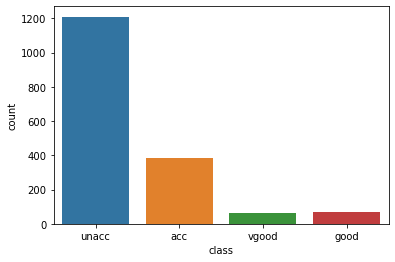

In [14]:
sns.countplot(car['class'])

In [15]:
cars = pd.crosstab(car["maint"], car["class"])

In [16]:
cars

class,acc,good,unacc,vgood
maint,,,,
high,105,0,314,13
low,92,46,268,26
med,115,23,268,26
vhigh,72,0,360,0


In [17]:
cars = pd.crosstab(car["buying"], car["class"])

In [18]:
cars

class,acc,good,unacc,vgood
buying,,,,
high,108,0,324,0
low,89,46,258,39
med,115,23,268,26
vhigh,72,0,360,0


In [19]:
car['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [20]:
 from sklearn import preprocessing

In [21]:
label = preprocessing.LabelEncoder()

In [22]:
car['class']= label.fit_transform(car['class'])

In [23]:
car['class'].unique()

array([2, 0, 3, 1])

C:\Users\arti\anaconda3\anaconda.3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

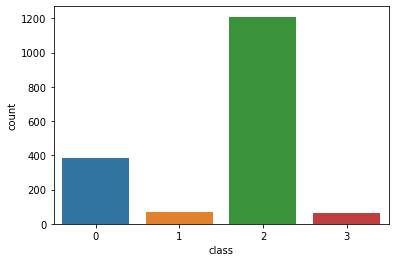

In [24]:
sns.countplot(car['class'])

In [25]:
car

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,2
1,vhigh,vhigh,2,2,small,med,2
2,vhigh,vhigh,2,2,small,high,2
3,vhigh,vhigh,2,2,med,low,2
4,vhigh,vhigh,2,2,med,med,2
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,1
1724,low,low,5more,more,med,high,3
1725,low,low,5more,more,big,low,2
1726,low,low,5more,more,big,med,1


In [26]:
x= car.drop(columns='class', axis=1)

In [27]:
x

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [28]:
y=car['class']

In [29]:
y

0       2
1       2
2       2
3       2
4       2
       ..
1723    1
1724    3
1725    2
1726    1
1727    3
Name: class, Length: 1728, dtype: int32

In [30]:
x

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
x_train.shape

(1382, 6)

In [33]:
y_train.shape

(1382,)

In [34]:
y_test.shape

(346,)

In [35]:
oe=OrdinalEncoder(categories=[['low','med','high','vhigh'],['low','med','high','vhigh'],['2','3','4','5more'],['2','4','more'],['small','med','big'],['low','med','high']])

In [36]:
oe.fit(x_train)

OrdinalEncoder(categories=[['low', 'med', 'high', 'vhigh'],
                           ['low', 'med', 'high', 'vhigh'],
                           ['2', '3', '4', '5more'], ['2', '4', 'more'],
                           ['small', 'med', 'big'], ['low', 'med', 'high']])

In [37]:
x_train_new=oe.transform(x_train)
x_test_new=oe.transform(x_test)

In [38]:
x_train_new.shape

(1382, 6)

In [39]:
bag_reg=BaggingClassifier(random_state=42)
bag_reg.fit(x_train_new,y_train)

BaggingClassifier(random_state=42)

In [40]:
y_pred=bag_reg.predict(x_test_new)

In [41]:
print(accuracy_score(y_test,y_pred))

0.9739884393063584
